In [15]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

from modules.expbuilder import default_params, run_exp

test_path = Path('../../../other-chess-data/regulation-test-all-2/')
train_path = Path('../../../rf-chess-data/cropped_v1/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# default_params

In [18]:
my_params = {
#     '_custom_train_fnames':     'stratify',
#     '_custom_train_fnames_args': {'path':train_path, 
#                                   'n':200, 
#                                   'np_seed':42},
#     '_fit_one_cycle_epochs':    2,
#     '_fine_tune_epochs':        3,
    '_test_path': test_path
}

In [19]:
run_params = default_params.copy()
run_params.update(my_params)

In [20]:
# run_params

In [21]:
run_exp(run_params, name_base='myproto', b_msg=True, b_cuda=True)

starting training...


saving to name_base: myproto-0
Finished with:

{'valid_loss': 0.06611721217632294, 'accuracy': 0.99303138256073}
{'test_loss': 1.7410168647766113, 'test_accuracy': 0.4517543911933899}


finished in 329.94 secs



In [23]:
!ls ../models/model-logs/*

../models/model-logs/myproto-0_params.json
../models/model-logs/myproto-0_residuals.csv
../models/model-logs/myproto-0_test.csv
../models/model-logs/myproto-0_valid.csv


In [24]:
!ls ../models/myproto*

../models/myproto-0.pkl


In [26]:
pd.read_csv('../models/model-logs/myproto-0_test.csv')

,test_loss,test_accuracy,test_subcat_color_acc,test_subcat_piece_acc
0,4.128279,0.096491,0.561404,0.192982
1,3.576448,0.162281,0.574561,0.320175
2,3.437822,0.171053,0.574561,0.324561
3,3.304719,0.192982,0.622807,0.399123
4,3.438754,0.175439,0.596491,0.442982
5,3.049783,0.241228,0.644737,0.425439
6,3.415750,0.192982,0.627193,0.368421
7,2.929957,0.219298,0.627193,0.438596
8,3.270455,0.179825,0.583333,0.429825
9,3.256601,0.171053,0.592105,0.394737


In [27]:
pd.read_csv('../models/model-logs/myproto-0_valid.csv')

,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc
0,2.077329,0.195737,0.951219,0.991289,0.959930
1,1.025586,0.115647,0.970383,0.993031,0.977352
2,0.685549,0.072873,0.986063,0.998258,0.987805
3,0.438775,0.082737,0.986063,0.998258,0.987805
4,0.390090,0.075639,0.991289,0.996516,0.994774
5,0.315681,0.077148,0.991289,0.996516,0.993031
6,0.281727,0.081228,0.989547,0.996516,0.991289
7,0.242435,0.075776,0.989547,0.996516,0.991289
8,0.224477,0.070623,0.991289,0.998258,0.993031
9,0.220039,0.066932,0.991289,0.998258,0.993031


In [29]:
from matplotlib import pyplot as plt

In [31]:
df_test = pd.read_csv('../models/model-logs/myproto-0_test.csv')
df_valid = pd.read_csv('../models/model-logs/myproto-0_valid.csv')

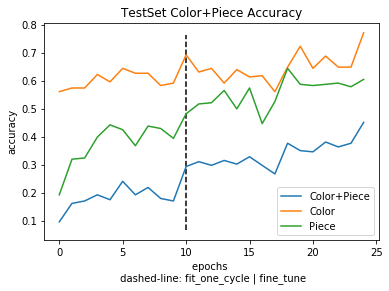

In [44]:
plt.plot(df_test['test_accuracy'], label='Color+Piece')
plt.plot(df_test['test_subcat_color_acc'], label='Color')
plt.plot(df_test['test_subcat_piece_acc'], label='Piece')

y0, y1 = plt.ylim()
plt.vlines(x=10, ymin=y0*1.05, ymax=y1*0.95, linestyles='dashed')

plt.title('TestSet Color+Piece Accuracy')
plt.xlabel('epochs \n dashed-line: fit_one_cycle | fine_tune')
plt.ylabel('accuracy')
plt.legend();


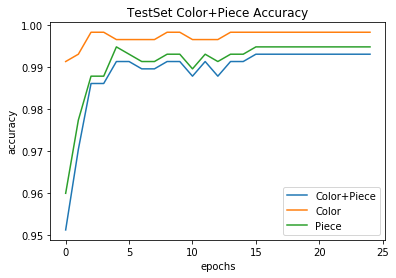

In [36]:
plt.plot(df_valid['accuracy'], label='Color+Piece')
plt.plot(df_valid['subcat_color_acc'], label='Color')
plt.plot(df_valid['subcat_piece_acc'], label='Piece')

plt.title('TestSet Color+Piece Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend();
